In [1]:
import pandas as pd
import plotly.express as px
import geopandas as gpd
import matplotlib.pyplot as plt

all_birds = pd.read_csv('F:\\Python_projects\\state_of_birds_india\\birds_vis\\all_birds.csv')
ind_adm1 = gpd.read_file('F:\\Python_projects\\state_of_birds_india\\birds_vis\\IND_adm1.gpkg')
india = ind_adm1.to_crs(epsg='24378')

In [2]:
print(set(all_birds['CITES Appendix']))
print(set(all_birds['Endemicity']))
print(set(all_birds['IUCN Category']))
print(set(all_birds['Habitat Specialization']))
print(set(all_birds['SoIB 2023 Priority Status']))

{'Appendix II', 'Appendix I', nan}
{'Non-endemic', 'Northern Myanmar Lowlands', 'Western Ghats', 'Nicobar Islands', 'Eastern Andhra Pradesh', 'Andaman Islands', 'Eastern Himalayas', 'Southern Deccan Plateau', 'Western Himalayas', 'Indus Plains', 'Andaman and Nicobar Islands', 'Western Ghats & Sri Lanka', 'Himalayas', 'Central India', 'Assam Plains', 'Indian Subcontinent', 'Mainland India'}
{'Vulnerable', 'Endangered', 'Least Concern', 'Critically Endangered', 'Near Threatened', 'Not Recognised'}
{'Forest & Plantation', 'Non-specialized', 'Wetland', 'Forest', 'Alpine & Cold Desert', 'Grassland', 'Open Habitat', 'Grassland & Scrub'}
{'Low', 'Moderate', 'High'}


#### Visualize Table 5: Correspondence between IUCN Red List Categories and SoIB Categories of Conservation Priority


#### Examine IUCN categories and SOIB 2023 Priority Status

In [24]:
tab5 = all_birds.groupby(['IUCN Category', 'SoIB 2023 Priority Status']).count().reset_index()
#define function for the custom sort
iucn_order = ['Critically Endangered', 'Endangered', 'Vulnerable', 'Near Threatened', 'Least Concern', 'Not Recognised']
soib_order = ['High', 'Moderate', 'Low']

tab5['IUCN Category'] = pd.Categorical(tab5['IUCN Category'], categories=iucn_order, ordered=True)
tab5['SoIB 2023 Priority Status'] = pd.Categorical(tab5['SoIB 2023 Priority Status'], categories=soib_order, ordered=True)

# Sort the DataFrame based on col1 and col2
result_sorted = tab5.sort_values(by=['IUCN Category', 'SoIB 2023 Priority Status']).reset_index(drop=True)
print(result_sorted.head(3))


           IUCN Category SoIB 2023 Priority Status  Unnamed: 0  English Name  \
0  Critically Endangered                      High         115           115   
1             Endangered                      High         122           122   
2             Endangered                       Low          26            26   

   Scientific Name  Order  Family  Endemicity  Habitat Specialization  \
0              115    115     115         115                     115   
1              122    122     122         122                     122   
2               26     26      26          26                      26   

   CITES Appendix  source  
0              91     115  
1              49     122  
2              26      26  


#### Visualize IUCN and SOIB priorities

In [22]:
# Define a function to create relevant maps and display a list of species as per our criteria

def stat_tab(df, iucn, soib):
    # Filter by criteria
    iucn_soib = df[(df['IUCN Category'] == iucn) & (df['SoIB 2023 Priority Status'] == soib)]
    
    # list of species
    iucn_soib_species = iucn_soib.loc[:, ~iucn_soib.columns.isin(['source', 'Unnamed: 0'])]
    iucn_soib_species = iucn_soib_species.drop_duplicates()
    print('List of ', iucn, ' and ', soib, ' priority bird species = ', '\n', iucn_soib_species['English Name'])
    #no of species classified as Critically Endangered and High status
    print( 'no of species classified as ', iucn, ' and ', soib, ' status = ' , len(iucn_soib_species))

    state_wise = iucn_soib.groupby('source').count().reset_index()[['source', 'Unnamed: 0']]
    result = pd.merge(india, state_wise, how='left', left_on='NAME_1', right_on='source')
    result['Unnamed: 0'].fillna(0, inplace=True)
    result['Unnamed: 0'] = round(result['Unnamed: 0'], 0)
    
    # Plot with color bar
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    # Use a single color bar for the entire plot
    cax = plt.cm.ScalarMappable(cmap='viridis_r')
    cax.set_array([result['Unnamed: 0']])
    
    n=len(set(result['Unnamed: 0']))-1
    
    result.plot(column='Unnamed: 0', 
            scheme='quantiles', k=n, cmap='viridis_r', 
            edgecolor='black', linewidth=0.25, 
            ax=ax, cax=cax)
    
    ax.set_title('Different types of birds in each state as per the State of Indian Birds report 2023')
    ax.set_axis_off()
    ax.autoscale()
    
    # Set the color bar label
    cax.set_clim(result['Unnamed: 0'].min(), result['Unnamed: 0'].max())
    cbar = fig.colorbar(cax, ax=ax, format = '%0.0f')
    cbar.set_label('No. of different bird species')
    
    plt.show()

    

List of  Critically Endangered  and  High  priority bird species =  
 244         Great Indian Bustard
245              Lesser Florican
318             Jerdon's Courser
370         White-rumped Vulture
371               Indian Vulture
663              Bengal Florican
731          White-bellied Heron
746           Red-headed Vulture
748       Slender-billed Vulture
1044             Bugun Liocichla
1200     Yellow-breasted Bunting
1223              Baer's Pochard
3919            Sociable Lapwing
12182            Himalayan Quail
Name: English Name, dtype: object
no of species classified as  Critically Endangered  and  High  status =  14


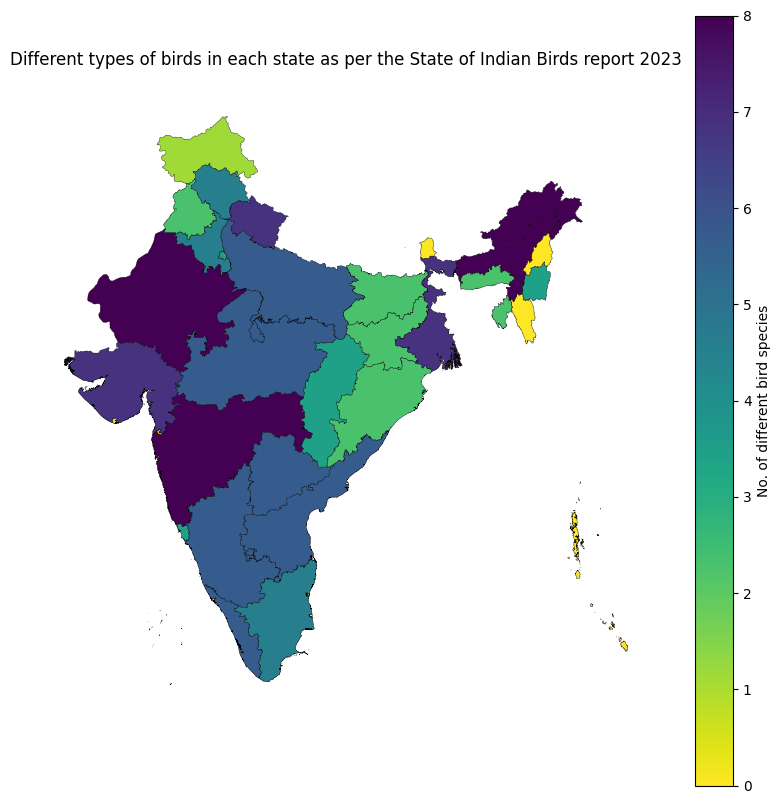

In [23]:
stat_tab(df = all_birds, iucn = 'Critically Endangered', soib='High')